<a href="https://colab.research.google.com/github/Seomzo/Project_1-Money_Printer/blob/crypto-correlation-finder/Copy_of_BTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Import the necessary library for downloading financial data
import yfinance as yf

In [23]:
# Download historical data for Bitcoin (BTC-USD) from January 1, 2015, to November 10, 2024
btc_data = yf.download('BTC-USD', start='2015-01-01', end='2024-11-10')

# Download historical data for Ethereum (ETH-USD) from January 1, 2015, to November 10, 2024
eth_data = yf.download('ETH-USD', start='2015-01-01', end='2024-11-10')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [24]:
# Rename columns for clarity
btc_data = btc_data[['Close']].rename(columns={'Close': 'BTC'})
eth_data = eth_data[['Close']].rename(columns={'Close': 'ETH'})

# Merge data on dates they have in common
combined_data = btc_data.join(eth_data, how='inner')
print(combined_data.head())  # Check the alignment


Price                              BTC         ETH
Ticker                         BTC-USD     ETH-USD
Date                                              
2017-11-09 00:00:00+00:00  7143.580078  320.884003
2017-11-10 00:00:00+00:00  6618.140137  299.252991
2017-11-11 00:00:00+00:00  6357.600098  314.681000
2017-11-12 00:00:00+00:00  5950.069824  307.907990
2017-11-13 00:00:00+00:00  6559.490234  316.716003


In [25]:
# Calculate daily returns for BTC and ETH by using pct_change function
combined_data['BTC Daily Return'] = combined_data['BTC'].pct_change()
combined_data['ETH Daily Return'] = combined_data['ETH'].pct_change()


In [26]:
# Calculate 30-day rolling correlation between BTC and ETH
combined_data['Rolling Correlation'] = combined_data['BTC Daily Return'].rolling(window=30).corr(combined_data['ETH Daily Return'])


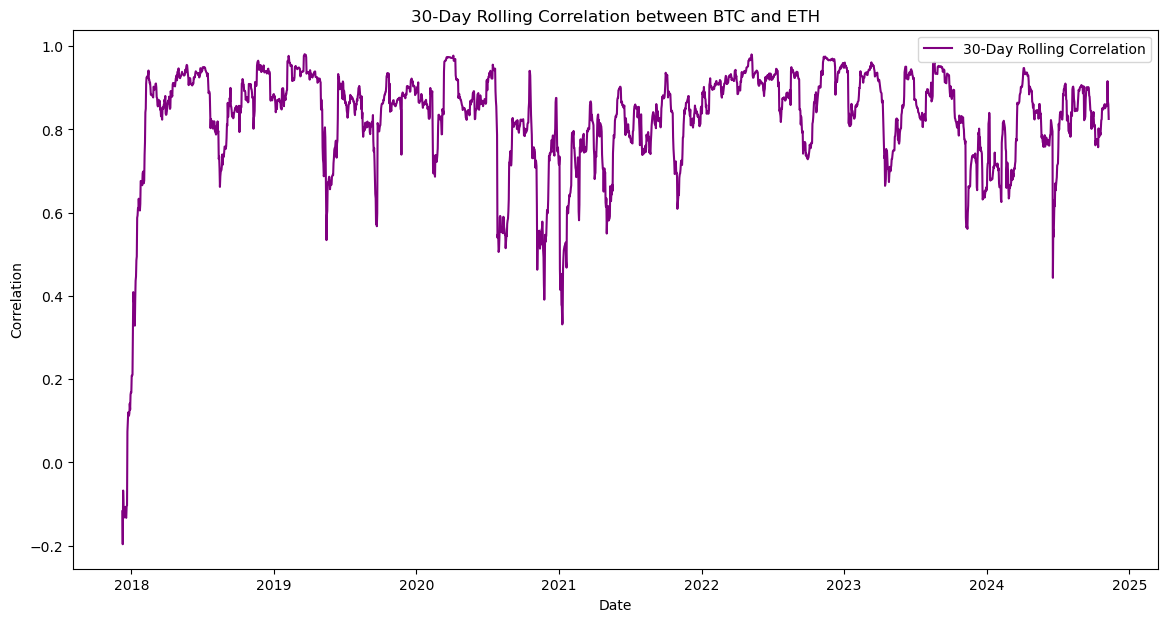

In [27]:
# Plot the 'Rolling Correlation' column from the combined_data DataFrame against its index (which represents dates)
# The line is labeled '30-Day Rolling Correlation' and colored purple for better visibility

plt.figure(figsize=(14, 7))
plt.plot(combined_data.index, combined_data['Rolling Correlation'], label='30-Day Rolling Correlation', color='purple')
plt.title("30-Day Rolling Correlation between BTC and ETH")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.legend()
plt.show()


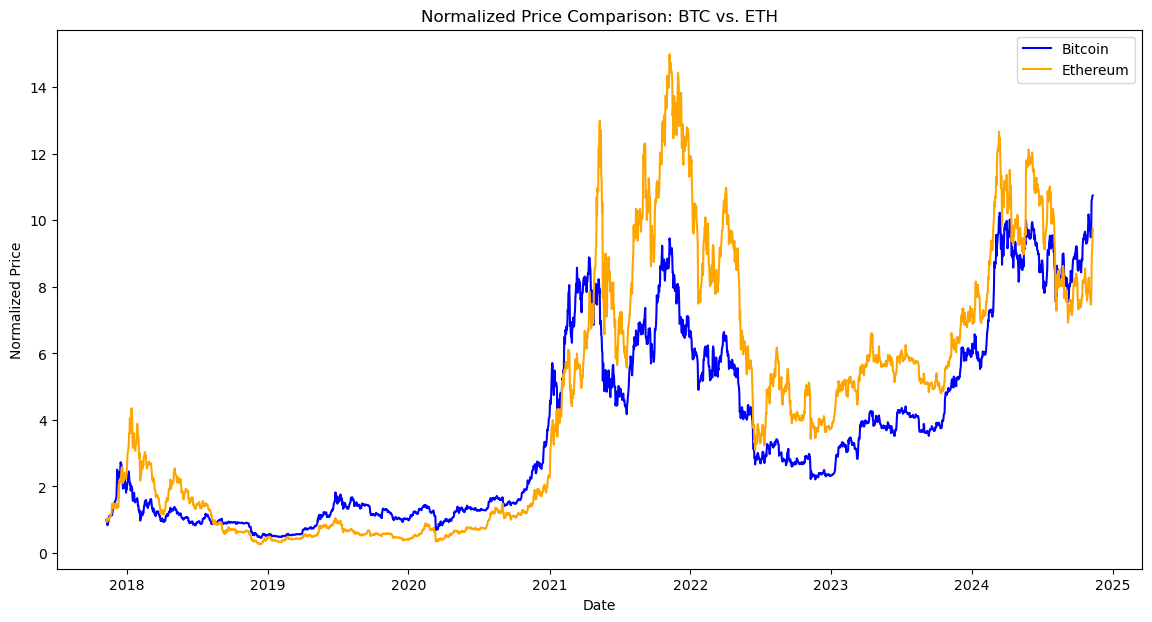

In [ ]:
# The code normalizes the prices of Bitcoin and Ethereum by dividing their values 
# by the first recorded price, allowing for a direct comparison. It then plots the 
# normalized prices over time, labeling each cryptocurrency and displaying the 
# results in a clear, visually distinct graph.

combined_data['BTC Normalized'] = combined_data['BTC'] / combined_data['BTC'].iloc[0]
combined_data['ETH Normalized'] = combined_data['ETH'] / combined_data['ETH'].iloc[0]

plt.figure(figsize=(14, 7))
plt.plot(combined_data.index, combined_data['BTC Normalized'], label='Bitcoin', color='blue')
plt.plot(combined_data.index, combined_data['ETH Normalized'], label='Ethereum', color='orange')
plt.title("Normalized Price Comparison: BTC vs. ETH")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()


In [28]:
# Rebuilding the dataframes for determining the correlation. 
# Download historical data for BTC, ETH, and SPY

btc_data = yf.download('BTC-USD', start='2019-01-01', end='2024-11-10')[['Close']]
eth_data = yf.download('ETH-USD', start='2019-01-01', end='2024-11-10')[['Close']]
spy_data = yf.download('SPY', start='2019-01-01', end='2024-11-10')[['Close']]

# Rename 'Close' columns for clarity
btc_data.columns = ['BTC']
eth_data.columns = ['ETH']
spy_data.columns = ['SPY']

# Merge BTC, ETH, and SPY data on date
combined_data = btc_data.join(eth_data, how='inner').join(spy_data, how='inner')
# Drop rows with NaN values from returns calculation
combined_data.dropna(inplace=True)
print(combined_data.head())  # Verify the new columns are correctly added


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                                   BTC         ETH         SPY
Date                                                          
2019-01-02 00:00:00+00:00  3943.409424  155.047684  250.179993
2019-01-03 00:00:00+00:00  3836.741211  149.135010  244.210007
2019-01-04 00:00:00+00:00  3857.717529  154.581940  252.389999
2019-01-07 00:00:00+00:00  4025.248291  151.699219  254.380005
2019-01-08 00:00:00+00:00  4030.847900  150.359634  256.769989


In [29]:
# Compute the correlation matrix for daily returns
correlation_matrix = combined_data[['BTC', 'ETH', 'SPY']].corr()

# Display the correlation matrix
print("Correlation Matrix for Daily Returns:")
print(correlation_matrix)


Correlation Matrix for Daily Returns:
          BTC       ETH       SPY
BTC  1.000000  0.909199  0.902706
ETH  0.909199  1.000000  0.861635
SPY  0.902706  0.861635  1.000000


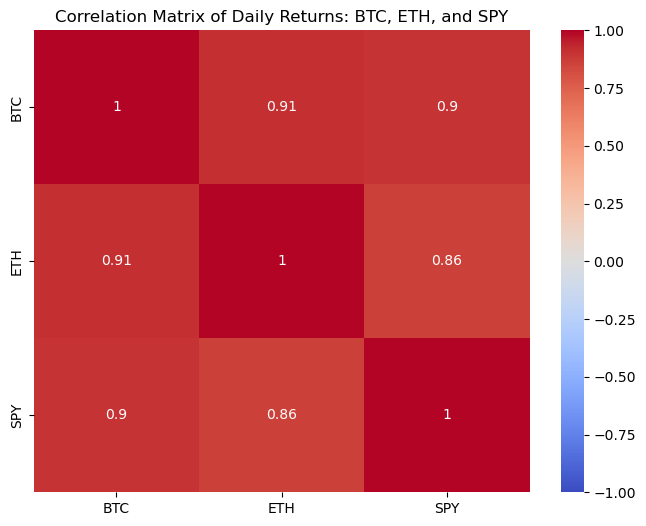

In [ ]:
# The code creates a heatmap to visualize the correlation matrix of daily returns
#  for Bitcoin (BTC), Ethereum (ETH), and the S&P 500 (SPY) using Seaborn. It 
# includes annotations for correlation values and uses a color palette ranging 
# from -1 to 1, with a specified figure size. Finally, it displays the heatmap 
# with a title.

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Daily Returns: BTC, ETH, and SPY")
plt.show()
